In [1]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import math

In [2]:
def convert2Radian(degree) :
    return (degree / 180)* (math.pi)

def drawPlot() :
    plt.plot(ana_posx_arr, ana_posy_arr, color="green", label="analitik")
    plt.plot(num_posx_arr, num_posy_arr, color="orange", label="numerik")
    plt.xlim(0-1,max(ana_posx_arr)+10)
    plt.ylim(0,max(ana_posy_arr)+3)
    plt.legend()
    plt.show()

In [3]:
print ("Initalize......")

alpha_angle = 60 # degree [not radiant]
starting_pos = [0,0] # x, y
starting_vel = 50 # mps
time_step = 0.1
gravity = -9.8


Initalize......


In [4]:
print ("Numerik ...")
time_arr = [0]
# init starting vel _ devided
num_velx_arr = [starting_vel * math.cos(convert2Radian(30))]
num_vely_arr = [starting_vel * math.sin(convert2Radian(30))]

# init pos, [x,y]
num_posx_arr = [starting_pos[0]]
num_posy_arr = [starting_pos[-1]]

# stoppage
stp_age = 0

while (len(num_posy_arr) == 1 or stp_age >= 0) :
    temp_time = time_arr[-1] + time_step
    num_velx_temp = num_velx_arr[-1]
    num_vely_temp = num_vely_arr[-1] + (gravity * time_step)
    num_posx_temp = num_posx_arr[-1] + num_velx_temp * time_step
    num_posy_temp = num_posy_arr[-1] + num_vely_temp * time_step
    #print("Cur Pos" + str(num_posy_temp))
    stp_age = num_posy_temp
    if (num_posy_temp >= 0) :
        time_arr.append(temp_time)
        num_velx_arr.append(num_velx_temp)
        num_vely_arr.append(num_vely_temp)
        num_posx_arr.append(num_posx_temp)
        num_posy_arr.append(num_posy_temp)

    #print(time_arr)
    #print(num_posy_arr)


Numerik ...


In [5]:
print ("Analitik ...")

# init pos, [x,y]
ana_posx_arr = [starting_pos[0]]
ana_posy_arr = [starting_pos[-1]]


for tm in time_arr: 
    ana_posx_arr.append(starting_vel * math.cos(convert2Radian(30))*tm)
    ana_posy_arr.append((starting_vel * math.sin(convert2Radian(30))*tm) + (0.5 * gravity * (tm ** 2)))
  

Analitik ...


In [6]:
def animateSim(file_name, posx_arr, posy_arr, time_arr, **kwargs) :
    if kwargs != None :
        num_velx_arr2 = kwargs.get('num_velx_arr')
        num_vely_arr2 = kwargs.get('num_vely_arr')
    
    fig = plt.figure()
    #plt.ylim(0, 100)
    ax1 = fig.add_subplot(1,1,1)
    #ax1.ylim(0, 100)
    def animate(i):
        xs = posx_arr
        ys = posy_arr
        temp_x = []
        temp_y = []
        ax1.clear()
        for i in range(0, len(xs)) :
            temp_x.append(xs[i])
            temp_y.append(ys[i])
            ax1.clear()
            for j in range(0, len(temp_x)):
                ax1.plot(temp_x, temp_y, color='green')
            
    
    #ani = animation.FuncAnimation(fig, animate, interval=1000)
    # call the animator     
    anim = animation.FuncAnimation(fig, animate, interval=20) 

    # save the animation as mp4 video file 
    anim.save('%s.mp4' % file_name , writer = 'ffmpeg', fps = 120)
    
    plt.show()

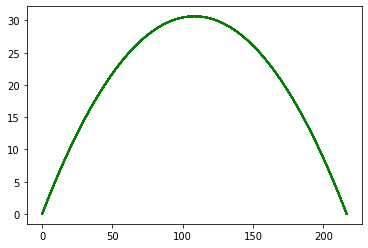

In [7]:
# draw plot
#drawPlot()
animateSim("gp_2",num_posx_arr, num_posy_arr, time_arr, num_velx_arr=num_velx_arr, num_vely_arr=num_vely_arr)